In [ ]:
# default_exp nbeats.learner

In [ ]:
# hide
import sys

sys.path.append("..")
import pandas as pd
%load_ext autoreload
%autoreload 2

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# N-Beats Learner

> A basic architecture for time series forecasting.


The approach is based on https://arxiv.org/abs/1905.10437


In [ ]:
# hide
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
#export
from fastcore.utils import *
from fastcore.imports import *
from fastai2.basics import *
from fastai2.callback.hook import num_features_model
from fastai2.callback.all import *
from fastai2.torch_core import *
from torch.autograd import Variable
from fastseq.all import *

from fastseq.nbeats.model import *
from fastseq.nbeats.callbacks import *

## Learner

In [ ]:
# export
# from fastai2.basics import *
# from fastseq.all import *

@delegates(NBeatsNet.__init__)
def nbeats_learner(dbunch:TSDataLoaders, output_channels=None, metrics=None,cbs=None, b_loss=0., loss_func=None, opt_func=None, **kwargs):
    "Build a N-Beats style learner"  
    model = NBeatsNet(
        device = dbunch.train.device,
        horizon = dbunch.train.horizon,
        lookback = dbunch.train.lookback, 
        **kwargs
       )
    
    loss_func = ifnone(loss_func, CombinedLoss(F.mse_loss, dbunch.train.lookback))
    cbs = L(cbs)
    if b_loss != 0.:
        raise NotImplementedError()
        cbs.append(NBeatsBLoss(b_loss))
    opt_func = ifnone(opt_func, ranger)        
    learn = Learner(dbunch, model, loss_func=loss_func, opt_func= opt_func, 
                    metrics=L(metrics)+L(mae, smape, NBeatsTheta(), 
                                         NBeatsBackwards(dbunch.train.lookback), NBeatsForward(dbunch.train.lookback)
                                        ),
                    cbs=L(NBeatsAttention())+cbs
                   )
    learn.lh = (dbunch.train.lookback/dbunch.train.horizon)
    return learn

# Example

(1, 85)
Train:110; Valid: 20; Test 10


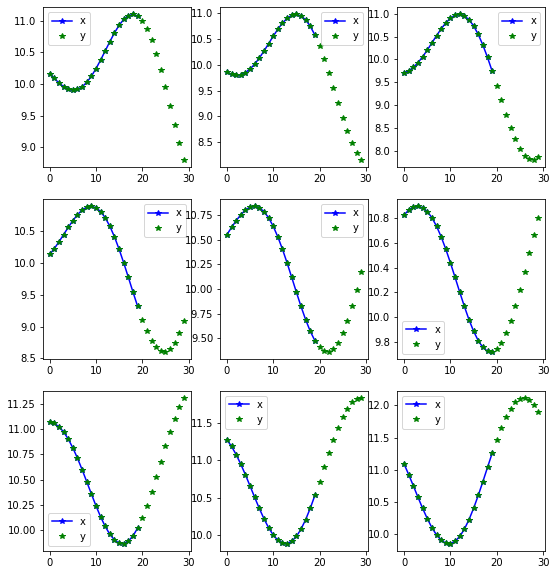

In [ ]:
horizon, lookback = 10,20
items = dummy_data_generator(75, 10, nrows=10)
data = TSDataLoaders.from_items(items, horizon = horizon, lookback=lookback, step=3, valid_pct=.5
                               )
data.show_batch()

In [ ]:
learn = nbeats_learner(data, metrics = NBeatsLossPart(0,-9,'Last'))

epoch,train_loss,valid_loss,Last,mae,smape,theta,b_loss,f_loss,time
0,9.662559,11.195292,0.215344,1.421551,1.809433,0.110910,nan,nan,00:00
1,9.282524,11.055916,0.214986,1.403921,1.740481,0.151765,nan,nan,00:00
2,8.970102,10.999589,0.216256,1.396747,1.700652,0.190312,nan,nan,00:00
3,8.795770,10.585422,0.203046,1.340611,1.547372,0.265827,nan,nan,00:00
4,8.505704,10.292929,0.194769,1.300532,1.438941,0.334915,nan,nan,00:00


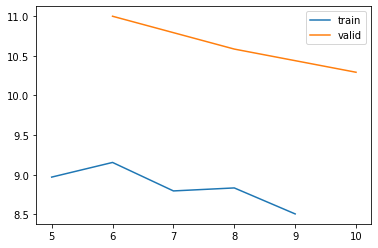

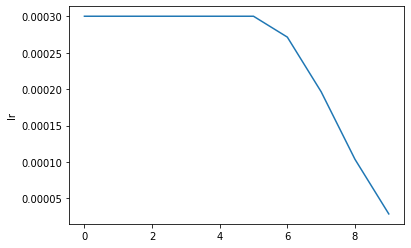

In [ ]:
learn.fit_flat_cos(5, 3e-4, pct_start=.5)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

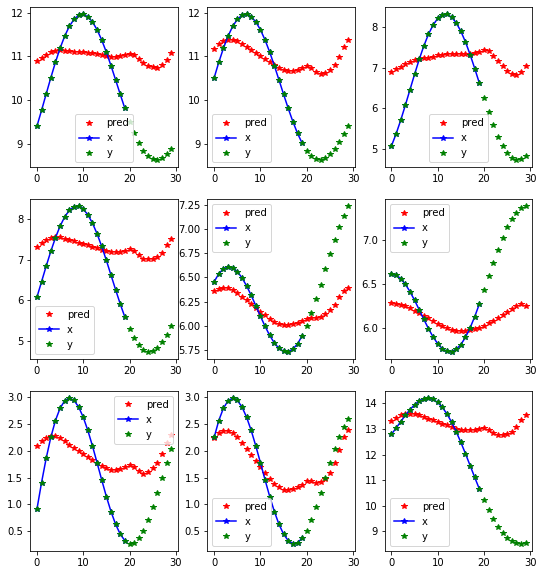

In [ ]:
learn.show_results()

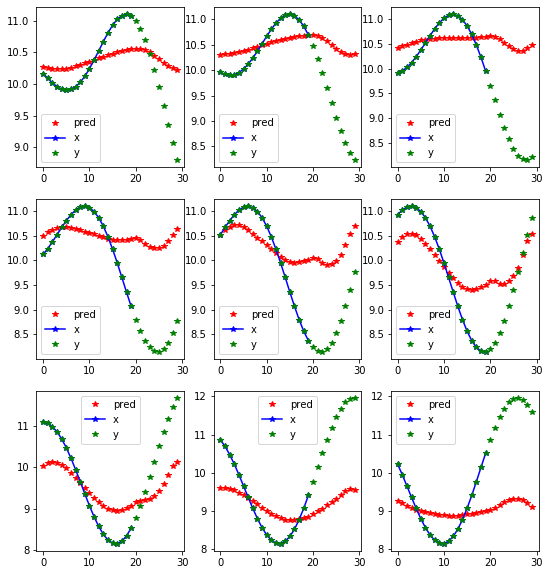

In [ ]:
learn.show_results(0)

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,0.002563896,0.004428773,-0.017024618,-0.0032799467,0.035596497,-0.048637226
theta_0_std,0.012274096,0.01062937,0.20439957,0.08522751,0.21640648,0.14205389
theta_1_mean,7.909979e-05,-0.00025032263,-0.014570078,0.041892935,0.027930785,-0.01713945
theta_1_std,0.0008209216,0.0011582883,0.03819517,0.047902115,0.03265468,0.023031006
theta_2_mean,2.3843606e-05,1.4632508e-05,0.06758767,0.028738508,0.0009002662,0.008183936
theta_2_std,0.000111527916,0.00010706537,0.080833934,0.16391087,0.022683503,0.0150134275
att_mean,0.50434,0.495483,0.492256,0.500691,0.498707,0.502528
att_std,0.0433728,0.048516,0.0285728,0.0288583,0.0348521,0.0330769
theta_3_mean,NaN,-1.0935587e-06,NaN,0.0071556102,0.06971932,-0.00070073456
theta_3_std,NaN,5.1697084e-06,NaN,0.040297046,0.065451354,0.13978548


In [ ]:
# hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
Converted 02_data.load.ipynb.
Converted 03_data.core.ipynb.
Converted 05_nbeats.models.ipynb.
Converted 06_nbeats.callbacks.ipynb.
Converted 07_nbeats.learner.ipynb.
Converted 08_nbeats.interpret.ipynb.
Converted 11_metrics.ipynb.
Converted 12_compare.ipynb.
Converted index.ipynb.
